In [77]:
#!pip install geopandas
#!pip install pyomo

In [78]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
data = pd.read_csv('RESAGEBURB_19CSV20.csv')
data.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
0,19,Nuevo León,0,Total de la entidad Nuevo León,0,Total de la entidad,0000,0,5784442,2893492,...,922162,1537687,1150914,806584,490746,306104,36729,57505,439479,9797
1,19,Nuevo León,1,Abasolo,0,Total del municipio,0000,0,2974,1532,...,101,746,351,359,126,108,18,43,399,9
2,19,Nuevo León,1,Abasolo,1,Total de la localidad urbana,0000,0,1992,1032,...,100,501,259,258,99,83,9,33,256,5
3,19,Nuevo León,1,Abasolo,1,Total AGEB urbana,0021,0,1114,583,...,50,284,160,141,62,54,4,17,133,*
4,19,Nuevo León,1,Abasolo,1,Abasolo,0021,1,80,43,...,*,19,7,15,6,8,0,0,12,0


In [80]:
df = data[data['NOM_LOC'] == 'Total AGEB urbana']

In [81]:
df.describe()

,ENTIDAD,MUN,LOC,MZA,POBTOT,VIVTOT
count,2765.0,2765.000000,2765.000000,2765.0,2765.000000,2765.000000
mean,19.0,27.534539,28.320072,0.0,2012.676311,692.470163
std,0.0,13.946273,90.150533,0.0,1760.997710,577.982443
min,19.0,1.000000,1.000000,0.0,0.000000,0.000000
25%,19.0,18.000000,1.000000,0.0,471.000000,204.000000
50%,19.0,28.000000,1.000000,0.0,1646.000000,610.000000
75%,19.0,39.000000,1.000000,0.0,3220.000000,1055.000000
max,19.0,51.000000,572.000000,0.0,11293.000000,4186.000000


In [82]:
df = df[df['NOM_MUN'] == 'Monterrey']
df

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
49232,19,Nuevo León,39,Monterrey,1,Total AGEB urbana,0014,0,192,89,...,48,52,51,47,32,37,*,*,*,*
49246,19,Nuevo León,39,Monterrey,1,Total AGEB urbana,0029,0,3778,1876,...,576,888,642,398,183,79,12,53,354,5
49292,19,Nuevo León,39,Monterrey,1,Total AGEB urbana,0033,0,3321,1669,...,542,789,592,283,156,100,16,48,271,4
49333,19,Nuevo León,39,Monterrey,1,Total AGEB urbana,0048,0,2757,1397,...,390,579,465,221,124,81,6,43,194,*
49366,19,Nuevo León,39,Monterrey,1,Total AGEB urbana,0052,0,3869,1921,...,557,797,638,311,154,69,15,48,260,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64970,19,Nuevo León,39,Monterrey,1,Total AGEB urbana,5547,0,2231,1112,...,586,660,651,529,489,375,5,0,3,0
65005,19,Nuevo León,39,Monterrey,1,Total AGEB urbana,5551,0,225,112,...,17,20,20,16,14,10,*,*,*,*
65019,19,Nuevo León,39,Monterrey,1,Total AGEB urbana,5566,0,1419,709,...,353,447,447,334,347,240,6,0,0,0
65049,19,Nuevo León,39,Monterrey,1,Total AGEB urbana,5570,0,409,195,...,118,129,127,108,108,88,0,0,0,0


In [83]:
df.AGEB.nunique()

491

In [84]:
df.describe()

,ENTIDAD,MUN,LOC,MZA,POBTOT,VIVTOT
count,491.0,491.0,491.0,491.0,491.000000,491.00000
mean,19.0,39.0,1.0,0.0,2327.804481,751.07943
std,0.0,0.0,0.0,0.0,1581.092081,474.78383
min,19.0,39.0,1.0,0.0,0.000000,0.00000
25%,19.0,39.0,1.0,0.0,1034.000000,355.00000
50%,19.0,39.0,1.0,0.0,2280.000000,771.00000
75%,19.0,39.0,1.0,0.0,3344.500000,1034.50000
max,19.0,39.0,1.0,0.0,8249.000000,2571.00000


In [85]:
TEC_AGEB = ['2167', '2082', '2063', '1991', '1915', '1760', '210A', '2097', '2010', '2006', '192A', '178A', '1775', '2114', '2025', '4661', '1934', '1794']
ageb_pre_codigo = '190390001'

In [86]:
tec = df[df['AGEB'].isin(TEC_AGEB)]

In [87]:
tec

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
54824,19,Nuevo León,39,Monterrey,1,Total AGEB urbana,1760,0,1986,979,...,391,592,478,300,193,98,10,21,157,3
54874,19,Nuevo León,39,Monterrey,1,Total AGEB urbana,1775,0,3247,1641,...,699,908,741,515,337,174,19,43,275,5
54911,19,Nuevo León,39,Monterrey,1,Total AGEB urbana,178A,0,2085,1097,...,587,648,589,389,257,114,9,5,109,0
54947,19,Nuevo León,39,Monterrey,1,Total AGEB urbana,1794,0,2555,1305,...,555,700,609,444,296,147,8,14,137,*
55289,19,Nuevo León,39,Monterrey,1,Total AGEB urbana,1915,0,1171,589,...,291,366,293,186,97,38,10,7,105,*
55315,19,Nuevo León,39,Monterrey,1,Total AGEB urbana,192A,0,2553,1380,...,764,830,814,609,455,220,9,4,69,0
55338,19,Nuevo León,39,Monterrey,1,Total AGEB urbana,1934,0,2171,1094,...,534,682,652,389,373,187,17,5,58,0
55478,19,Nuevo León,39,Monterrey,1,Total AGEB urbana,1991,0,3236,1633,...,712,943,747,484,328,144,25,34,270,4
55520,19,Nuevo León,39,Monterrey,1,Total AGEB urbana,2006,0,1972,1026,...,563,673,653,449,373,172,8,7,37,0
55551,19,Nuevo León,39,Monterrey,1,Total AGEB urbana,2010,0,377,220,...,35,42,40,24,19,9,*,0,3,0


In [88]:
gdf = gpd.read_file('AGEB_MTY.shp')
gdf

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry
0,1900100010021,19,001,0001,0021,"POLYGON ((2.66e+06 1.55e+06, 2.66e+06 1.55e+06..."
1,1900100010036,19,001,0001,0036,"POLYGON ((2.66e+06 1.54e+06, 2.66e+06 1.54e+06..."
2,1900100010055,19,001,0001,0055,"POLYGON ((2.66e+06 1.54e+06, 2.66e+06 1.54e+06..."
3,1900100010040,19,001,0001,0040,"POLYGON ((2.66e+06 1.55e+06, 2.66e+06 1.54e+06..."
4,1900200010230,19,002,0001,0230,"POLYGON ((2.74e+06 1.59e+06, 2.74e+06 1.59e+06..."
...,...,...,...,...,...,...
2760,190450551044A,19,045,0551,044A,"POLYGON ((2.67e+06 1.54e+06, 2.67e+06 1.54e+06..."
2761,1903103572154,19,031,0357,2154,"POLYGON ((2.69e+06 1.52e+06, 2.69e+06 1.52e+06..."
2762,190450559051A,19,045,0559,051A,"POLYGON ((2.67e+06 1.54e+06, 2.67e+06 1.54e+06..."
2763,1902500030038,19,025,0003,0038,"POLYGON ((2.68e+06 1.54e+06, 2.68e+06 1.54e+06..."


In [89]:
tec_gdf = gdf[gdf['CVE_AGEB'].isin(TEC_AGEB)]
tec_gdf = tec_gdf[tec_gdf['CVE_MUN'] == '039']

tec_gdf

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,geometry
891,1903900012114,19,039,0001,2114,"POLYGON ((2.67e+06 1.51e+06, 2.67e+06 1.51e+06..."
899,1903900012063,19,039,0001,2063,"POLYGON ((2.67e+06 1.51e+06, 2.67e+06 1.51e+06..."
901,1903900011760,19,039,0001,1760,"POLYGON ((2.67e+06 1.51e+06, 2.67e+06 1.51e+06..."
902,1903900011934,19,039,0001,1934,"POLYGON ((2.67e+06 1.51e+06, 2.67e+06 1.51e+06..."
903,190390001192A,19,039,0001,192A,"POLYGON ((2.67e+06 1.51e+06, 2.67e+06 1.51e+06..."
907,1903900011991,19,039,0001,1991,"POLYGON ((2.67e+06 1.51e+06, 2.67e+06 1.51e+06..."
908,1903900012006,19,039,0001,2006,"POLYGON ((2.67e+06 1.51e+06, 2.67e+06 1.51e+06..."
935,1903900011775,19,039,0001,1775,"POLYGON ((2.67e+06 1.51e+06, 2.67e+06 1.51e+06..."
936,190390001178A,19,039,0001,178A,"POLYGON ((2.67e+06 1.51e+06, 2.67e+06 1.51e+06..."
938,190390001210A,19,039,0001,210A,"POLYGON ((2.67e+06 1.51e+06, 2.67e+06 1.51e+06..."


In [90]:
tec_ageb_gdf = tec_gdf[['CVEGEO', 'CVE_AGEB', 'geometry']].copy()

tec_ageb_gdf['Centroide'] = tec_ageb_gdf.geometry.centroid
tec_ageb_gdf['Longitud'] = tec_ageb_gdf['Centroide'].x
tec_ageb_gdf['Latitud'] = tec_ageb_gdf['Centroide'].y

tec_ageb_gdf

,CVEGEO,CVE_AGEB,geometry,Centroide,Longitud,Latitud
891,1903900012114,2114,"POLYGON ((2.67e+06 1.51e+06, 2.67e+06 1.51e+06...",POINT (2.67e+06 1.51e+06),2.672147e+06,1.511782e+06
899,1903900012063,2063,"POLYGON ((2.67e+06 1.51e+06, 2.67e+06 1.51e+06...",POINT (2.67e+06 1.51e+06),2.669754e+06,1.512279e+06
901,1903900011760,1760,"POLYGON ((2.67e+06 1.51e+06, 2.67e+06 1.51e+06...",POINT (2.67e+06 1.51e+06),2.669815e+06,1.513684e+06
902,1903900011934,1934,"POLYGON ((2.67e+06 1.51e+06, 2.67e+06 1.51e+06...",POINT (2.67e+06 1.51e+06),2.671127e+06,1.512930e+06
903,190390001192A,192A,"POLYGON ((2.67e+06 1.51e+06, 2.67e+06 1.51e+06...",POINT (2.67e+06 1.51e+06),2.670478e+06,1.513327e+06
907,1903900011991,1991,"POLYGON ((2.67e+06 1.51e+06, 2.67e+06 1.51e+06...",POINT (2.67e+06 1.51e+06),2.669563e+06,1.512708e+06
908,1903900012006,2006,"POLYGON ((2.67e+06 1.51e+06, 2.67e+06 1.51e+06...",POINT (2.67e+06 1.51e+06),2.670198e+06,1.512703e+06
935,1903900011775,1775,"POLYGON ((2.67e+06 1.51e+06, 2.67e+06 1.51e+06...",POINT (2.67e+06 1.51e+06),2.670491e+06,1.513888e+06
936,190390001178A,178A,"POLYGON ((2.67e+06 1.51e+06, 2.67e+06 1.51e+06...",POINT (2.67e+06 1.51e+06),2.670855e+06,1.513564e+06
938,190390001210A,210A,"POLYGON ((2.67e+06 1.51e+06, 2.67e+06 1.51e+06...",POINT (2.67e+06 1.51e+06),2.671399e+06,1.511657e+06


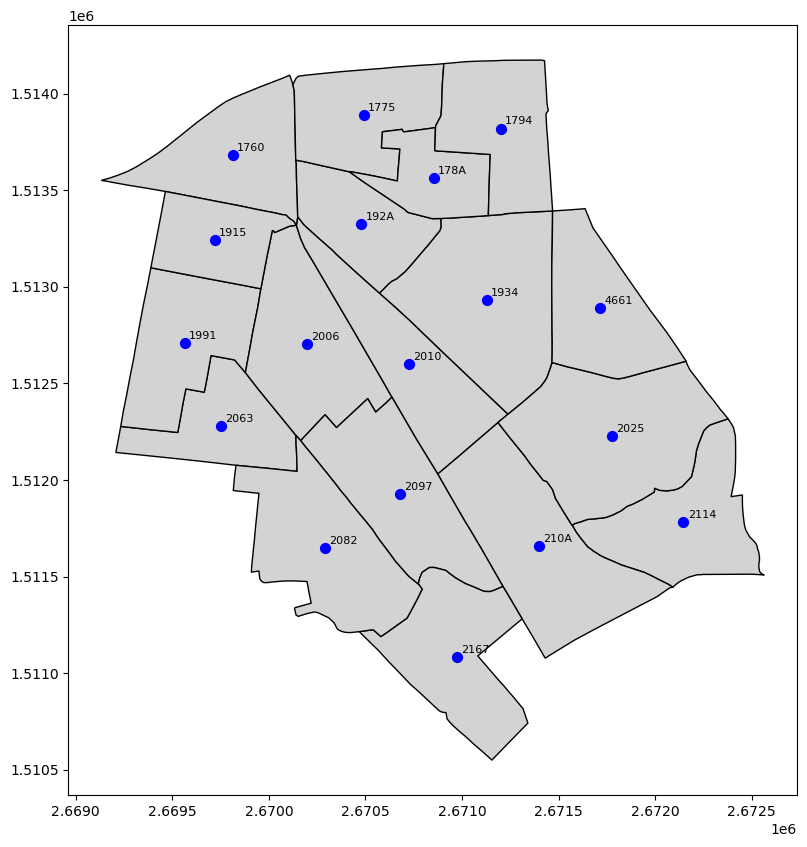

In [91]:
ax = tec_gdf.plot(edgecolor='black', facecolor='lightgray', figsize=(10, 10))

tec_ageb_gdf.set_geometry('Centroide').plot(ax=ax, marker='o', color='blue', markersize=50)

for x, y, label in zip(tec_ageb_gdf.Longitud, tec_ageb_gdf.Latitud, tec_ageb_gdf.CVE_AGEB):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8)

In [92]:
oxxo_df1 = pd.read_csv('dataset_comp_ratio.csv')
oxxo_df2 = pd.read_csv('dataset_comp_ratio_test.csv')

oxxo_df = pd.concat([oxxo_df1, oxxo_df2])
oxxo_df

,TIENDA_ID,dist_comp_directa,num_comp_directa,dist_comp_indirecta,num_comp_indirecta,VENTA_TOTAL,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET,META_VENTA,RATIO_CUMPLIMIENTO
0,126,71.235295,7,254.698363,1,9.827529e+05,1.0,BC,Hogar,127.4200,13.0,25.69107,-100.21261,Hogar Reunión,UT_DENSIDAD,TRAIN,490000.0,2.005618
1,681,707.882488,4,1441.429253,0,9.019971e+05,1.0,C,Hogar,128.1300,13.0,25.73571,-100.18086,Hogar Reunión,UT_DENSIDAD,TRAIN,490000.0,1.840810
2,117,18.104075,8,251.026853,4,4.945149e+05,1.0,C,Base,87.6200,11.0,25.71883,-100.19133,Hogar Reunión,UT_DENSIDAD,TRAIN,480000.0,1.030239
3,682,614.127087,4,2000.000000,0,9.685383e+05,1.0,C,Hogar,90.7000,13.0,25.66952,-100.20744,Hogar Reunión,UT_DENSIDAD,TRAIN,490000.0,1.976609
4,275,618.241258,7,764.038094,1,8.594114e+05,1.0,C,Hogar,95.3000,13.0,25.73766,-100.16116,Hogar Reunión,UT_DENSIDAD,TRAIN,490000.0,1.753901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,1010,973.865456,1,770.538032,1,1.790760e+06,2.0,C,Hogar,104.9800,12.0,26.07052,-98.32878,Hogar Reunión,UT_TRAFICO_VEHICULAR,TEST,490000.0,3.654612
101,1020,1072.845590,0,2000.000000,0,1.488837e+06,2.0,C,Hogar,116.9000,13.0,26.00370,-98.21478,Hogar Reunión,UT_DENSIDAD,TEST,490000.0,3.038444
102,1030,345.953223,1,2000.000000,0,5.334633e+05,2.0,C,Receso,121.3000,12.0,26.40152,-99.02246,Barrio Competido,UT_TRAFICO_PEATONAL,TEST,516000.0,1.033844
103,1040,2000.000000,0,2000.000000,0,1.161882e+06,2.0,C,Hogar,108.0493,12.0,26.22708,-98.59373,Hogar Reunión,UT_TRAFICO_VEHICULAR,TEST,490000.0,2.371187


In [93]:
oxxo_gdf = gpd.GeoDataFrame(oxxo_df,
    geometry = gpd.points_from_xy(oxxo_df['LONGITUD_NUM'], oxxo_df['LATITUD_NUM']),
    crs="EPSG:4326")

oxxo_gdf = oxxo_gdf.to_crs(tec_ageb_gdf.crs)
oxxo_gdf

,TIENDA_ID,dist_comp_directa,num_comp_directa,dist_comp_indirecta,num_comp_indirecta,VENTA_TOTAL,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET,META_VENTA,RATIO_CUMPLIMIENTO,geometry
0,126,71.235295,7,254.698363,1,9.827529e+05,1.0,BC,Hogar,127.4200,13.0,25.69107,-100.21261,Hogar Reunión,UT_DENSIDAD,TRAIN,490000.0,2.005618,POINT (2.68e+06 1.52e+06)
1,681,707.882488,4,1441.429253,0,9.019971e+05,1.0,C,Hogar,128.1300,13.0,25.73571,-100.18086,Hogar Reunión,UT_DENSIDAD,TRAIN,490000.0,1.840810,POINT (2.68e+06 1.52e+06)
2,117,18.104075,8,251.026853,4,4.945149e+05,1.0,C,Base,87.6200,11.0,25.71883,-100.19133,Hogar Reunión,UT_DENSIDAD,TRAIN,480000.0,1.030239,POINT (2.68e+06 1.52e+06)
3,682,614.127087,4,2000.000000,0,9.685383e+05,1.0,C,Hogar,90.7000,13.0,25.66952,-100.20744,Hogar Reunión,UT_DENSIDAD,TRAIN,490000.0,1.976609,POINT (2.68e+06 1.51e+06)
4,275,618.241258,7,764.038094,1,8.594114e+05,1.0,C,Hogar,95.3000,13.0,25.73766,-100.16116,Hogar Reunión,UT_DENSIDAD,TRAIN,490000.0,1.753901,POINT (2.68e+06 1.52e+06)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,1010,973.865456,1,770.538032,1,1.790760e+06,2.0,C,Hogar,104.9800,12.0,26.07052,-98.32878,Hogar Reunión,UT_TRAFICO_VEHICULAR,TEST,490000.0,3.654612,POINT (2.87e+06 1.56e+06)
101,1020,1072.845590,0,2000.000000,0,1.488837e+06,2.0,C,Hogar,116.9000,13.0,26.00370,-98.21478,Hogar Reunión,UT_DENSIDAD,TEST,490000.0,3.038444,POINT (2.88e+06 1.56e+06)
102,1030,345.953223,1,2000.000000,0,5.334633e+05,2.0,C,Receso,121.3000,12.0,26.40152,-99.02246,Barrio Competido,UT_TRAFICO_PEATONAL,TEST,516000.0,1.033844,POINT (2.8e+06 1.6e+06)
103,1040,2000.000000,0,2000.000000,0,1.161882e+06,2.0,C,Hogar,108.0493,12.0,26.22708,-98.59373,Hogar Reunión,UT_TRAFICO_VEHICULAR,TEST,490000.0,2.371187,POINT (2.84e+06 1.58e+06)


In [94]:
oxxo_gdf2 = oxxo_gdf[['TIENDA_ID', 'VENTA_TOTAL', 'MTS2VENTAS_NUM', 'geometry']].copy()
oxxo_gdf2['Longitdud'] = oxxo_gdf2.geometry.x
oxxo_gdf2['Latitud'] = oxxo_gdf2.geometry.y

In [95]:
dist_matrix = oxxo_gdf2.geometry.apply(lambda x: tec_ageb_gdf['Centroide'].distance(x))
min_distances = dist_matrix.min(axis=1)

oxxo_tec_gdf = oxxo_gdf2[(min_distances <= 900)]
oxxo_tec_gdf = oxxo_tec_gdf.reset_index(drop=True)

oxxo_dist_matrix = oxxo_tec_gdf.geometry.apply(lambda x: tec_ageb_gdf['Centroide'].distance(x))

oxxo_dist_matrix.columns = tec_ageb_gdf['CVE_AGEB']

oxxo_dist_matrix['Tamano'] = oxxo_tec_gdf['MTS2VENTAS_NUM']
oxxo_dist_matrix['TIENDA_TYPE'] = ['Oxxo {}'.format(i+1) for i in range(len(oxxo_dist_matrix))]

oxxo_tec_gdf['TIENDA_TYPE'] = oxxo_dist_matrix['TIENDA_TYPE']

oxxo_dist_matrix

CVE_AGEB,2114,2063,1760,1934,192A,1991,2006,1775,178A,210A,1915,2010,2025,4661,2097,1794,2167,2082,Tamano,TIENDA_TYPE
0,2401.437944,2792.564311,2058.888178,1410.992808,1577.773947,2681.785747,2179.170382,1354.522111,1132.191867,2538.691334,2287.509423,1904.489161,1931.459530,1273.997078,2507.635767,705.561621,3190.569791,2940.648032,127.3600,Oxxo 1
1,1977.866212,812.719084,1115.616158,731.250724,584.206138,856.835404,225.807618,1143.811946,927.067731,1464.697359,857.354978,336.890726,1452.967379,1303.795930,857.685814,1327.342658,1752.551280,1105.508350,112.0000,Oxxo 2
2,360.766095,2445.248312,3170.189105,1757.089098,2459.828956,2792.856243,2244.278572,2906.055345,2441.371584,687.267012,2948.167305,1765.920532,840.240371,1494.134396,1458.444829,2531.572927,1130.541718,1772.121331,100.5700,Oxxo 3
3,405.739798,2711.405825,3107.933855,1596.569135,2357.038706,2967.180152,2351.847701,2693.639423,2206.638974,1125.717987,2985.398601,1819.059976,702.751064,1124.341158,1782.816020,2173.934065,1765.666553,2201.688688,79.8633,Oxxo 4
4,2036.096517,448.407912,1685.457085,1349.068078,1347.366715,882.787772,680.081230,1896.272191,1701.882633,1326.316053,1282.451241,829.946900,1664.846171,1809.588901,560.291113,2090.190898,1269.265012,413.090979,127.6400,Oxxo 5
5,2004.393841,905.278238,1046.361306,678.207279,473.462314,901.662756,296.863537,1033.810843,815.784981,1525.939077,828.786737,370.383887,1464.404855,1262.553612,953.246096,1220.358964,1845.947726,1217.341647,82.8087,Oxxo 6
6,1752.431765,749.975417,1882.604487,1267.798379,1436.096226,1165.856028,833.984816,1996.337385,1732.344785,1028.788654,1510.474826,779.807737,1420.410234,1652.576613,281.131714,2086.592926,994.232715,267.901452,102.3833,Oxxo 7
7,2603.220333,1460.707283,500.213704,1073.553863,344.380295,1186.908476,932.939892,314.409898,547.185564,2251.764727,704.617177,1106.807603,2026.299623,1585.427231,1739.875639,908.242262,2630.158268,1981.042918,105.7838,Oxxo 8
8,2334.955202,2811.999706,2121.382227,1401.555464,1614.924401,2716.523916,2199.667937,1419.794257,1170.420970,2496.049829,2336.164960,1903.820099,1877.150778,1225.504625,2493.070802,749.924864,3156.602835,2932.859928,81.8612,Oxxo 9
9,2528.069517,2515.576508,1652.284773,1289.192185,1255.067302,2351.467895,1906.140642,946.298368,823.234051,2536.274606,1916.221499,1723.894180,2001.947890,1343.032112,2373.986938,417.547592,3136.666567,2771.226689,110.9400,Oxxo 10


In [96]:
df = pd.read_excel('ventas_oxxo.xlsx', sheet_name='pedidos_davis')
df

,nombre_tienda,nombre_SuperGrupo,nombre_Categoria,monto,unidades
0,Campo Militar REX,Jugos,Jugo y Nectar,6944.629783,342.696
1,Rodriguez REX,Botanas,Cacahuates/semillas,10079.532981,472.188
2,Estacion Reyes MTY,Fast Food Alimentos,Comida Deshidratada,3513.458034,146.496
3,Sungwoo MTY,Fast Food Alimentos,Comida Deshidratada,19524.816964,759.294
4,Progreso MTY,Galletas,Galleta Dulce,17667.038238,852.162
...,...,...,...,...,...
161338,Mision San Pablo MTY,Vinos y Licores,Vinos de Mesa,77.996041,1.000
161339,Obreros Mexicanos MTY,Entretenimiento,Coleccionables,96.883560,1.308
161340,Av. Cartagena MTY,Helados,Pasteles,185.736000,1.308
161341,Universo MTY,Cigarros,Sistemas Alternativo,36.643619,1.000


In [97]:
def calcular_tienda_venta(df, tienda):
    df_tienda = df[df['nombre_tienda'] == tienda].copy()
    total_venta_tienda = df_tienda['monto'].sum()
    return total_venta_tienda

In [98]:
oxxo1 = calcular_tienda_venta(df, 'Francisco Villa MTY')
oxxo2 = calcular_tienda_venta(df, 'Pirineos MTY')
oxxo3 = calcular_tienda_venta(df, 'Tres Caminos MTY')
oxxo4 = calcular_tienda_venta(df, 'La Primavera MTY')
oxxo5 = calcular_tienda_venta(df, 'Aguanaval MTY')
oxxo6 = calcular_tienda_venta(df, 'Roma II MTY')
oxxo7 = calcular_tienda_venta(df, 'Mini Mexico MTY')
oxxo8 = calcular_tienda_venta(df, 'Plaza Florida MTY')
oxxo9 = calcular_tienda_venta(df, 'Chapultepec II MTY')
oxxo10 = calcular_tienda_venta(df, 'Los Portales MTY')
oxxo11 = calcular_tienda_venta(df, 'Macario MTY')
oxxo12 = calcular_tienda_venta(df, 'Loma Larga MTY')
oxxo13 = calcular_tienda_venta(df, 'Caracol II MTY')
oxxo14 = calcular_tienda_venta(df, 'Tecnologico MTY')
oxxo15 = calcular_tienda_venta(df, 'Rio Panuco MTY')
oxxo16 = calcular_tienda_venta(df, 'Florida MTY')
oxxo17 = calcular_tienda_venta(df, 'Las Hadas MTY')
oxxo18 = calcular_tienda_venta(df, 'Alfonso Reyes MTY')
oxxo19 = calcular_tienda_venta(df, 'Estadio MTY')
oxxo20 = calcular_tienda_venta(df, 'Caracas MTY')
oxxo21 = calcular_tienda_venta(df, 'Revolucion MTY')
oxxo22 = calcular_tienda_venta(df, 'Lirios MTY')
oxxo23 = calcular_tienda_venta(df, 'Buenos Aires MTY')
oxxo24 = calcular_tienda_venta(df, 'Jose Alvarado MTY')
oxxo25 = calcular_tienda_venta(df, 'Ancon del HuajucoMTY')
oxxo26 = calcular_tienda_venta(df, 'Pedro Martinez MTY')

In [99]:
oxxo_ventas = [
    oxxo1, oxxo2, oxxo3, oxxo4, oxxo5, oxxo6,
    oxxo7, oxxo8, oxxo9, oxxo10, oxxo11, oxxo12,
    oxxo13, oxxo14, oxxo15, oxxo16, oxxo17, oxxo18,
    oxxo19, oxxo20, oxxo21, oxxo22, oxxo23, oxxo24,
    oxxo25, oxxo26
]
oxxo_tiendas = [
    'Francisco Villa MTY', 'Pirineos MTY', 'Tres Caminos MTY',
    'La Primavera MTY', 'Aguanaval MTY', 'Roma II MTY',
    'Mini Mexico MTY', 'Plaza Florida MTY', 'Chapultepec II MTY',
    'Los Portales MTY', 'Macario MTY', 'Loma Larga MTY',
    'Caracol II MTY', 'Tecnologico MTY', 'Rio Panuco MTY',
    'Florida MTY', 'Las Hadas MTY', 'Alfonso Reyes MTY',
    'Estadio MTY', 'Caracas MTY', 'Revolucion MTY',
    'Lirios MTY', 'Buenos Aires MTY', 'Jose Alvarado MTY',
    'Ancon del HuajucoMTY', 'Pedro Martinez MTY'
]
oxxo_ventas_df = pd.DataFrame({
    'TIENDA_TYPE': ['Oxxo {}'.format(i+1) for i in range(len(oxxo_ventas))],
    'nombre_tienda': oxxo_tiendas,
    'monto': oxxo_ventas
})
oxxo_ventas_df['monto'] = oxxo_ventas_df.monto * 12
oxxo_ventas_df

,TIENDA_TYPE,nombre_tienda,monto
0,Oxxo 1,Francisco Villa MTY,6.026043e+06
1,Oxxo 2,Pirineos MTY,5.681977e+06
2,Oxxo 3,Tres Caminos MTY,1.502796e+07
3,Oxxo 4,La Primavera MTY,9.492603e+06
4,Oxxo 5,Aguanaval MTY,1.214137e+07
5,Oxxo 6,Roma II MTY,4.818259e+06
6,Oxxo 7,Mini Mexico MTY,6.210274e+06
7,Oxxo 8,Plaza Florida MTY,1.149587e+07
8,Oxxo 9,Chapultepec II MTY,1.135172e+07
9,Oxxo 10,Los Portales MTY,1.012559e+07


In [100]:
oxxo_dist_matrix = pd.merge(oxxo_dist_matrix, oxxo_ventas_df, on='TIENDA_TYPE', how='left')
oxxo_dist_matrix

,2114,2063,1760,1934,192A,1991,2006,1775,178A,210A,...,2025,4661,2097,1794,2167,2082,Tamano,TIENDA_TYPE,nombre_tienda,monto
0,2401.437944,2792.564311,2058.888178,1410.992808,1577.773947,2681.785747,2179.170382,1354.522111,1132.191867,2538.691334,...,1931.459530,1273.997078,2507.635767,705.561621,3190.569791,2940.648032,127.3600,Oxxo 1,Francisco Villa MTY,6.026043e+06
1,1977.866212,812.719084,1115.616158,731.250724,584.206138,856.835404,225.807618,1143.811946,927.067731,1464.697359,...,1452.967379,1303.795930,857.685814,1327.342658,1752.551280,1105.508350,112.0000,Oxxo 2,Pirineos MTY,5.681977e+06
2,360.766095,2445.248312,3170.189105,1757.089098,2459.828956,2792.856243,2244.278572,2906.055345,2441.371584,687.267012,...,840.240371,1494.134396,1458.444829,2531.572927,1130.541718,1772.121331,100.5700,Oxxo 3,Tres Caminos MTY,1.502796e+07
3,405.739798,2711.405825,3107.933855,1596.569135,2357.038706,2967.180152,2351.847701,2693.639423,2206.638974,1125.717987,...,702.751064,1124.341158,1782.816020,2173.934065,1765.666553,2201.688688,79.8633,Oxxo 4,La Primavera MTY,9.492603e+06
4,2036.096517,448.407912,1685.457085,1349.068078,1347.366715,882.787772,680.081230,1896.272191,1701.882633,1326.316053,...,1664.846171,1809.588901,560.291113,2090.190898,1269.265012,413.090979,127.6400,Oxxo 5,Aguanaval MTY,1.214137e+07
5,2004.393841,905.278238,1046.361306,678.207279,473.462314,901.662756,296.863537,1033.810843,815.784981,1525.939077,...,1464.404855,1262.553612,953.246096,1220.358964,1845.947726,1217.341647,82.8087,Oxxo 6,Roma II MTY,4.818259e+06
6,1752.431765,749.975417,1882.604487,1267.798379,1436.096226,1165.856028,833.984816,1996.337385,1732.344785,1028.788654,...,1420.410234,1652.576613,281.131714,2086.592926,994.232715,267.901452,102.3833,Oxxo 7,Mini Mexico MTY,6.210274e+06
7,2603.220333,1460.707283,500.213704,1073.553863,344.380295,1186.908476,932.939892,314.409898,547.185564,2251.764727,...,2026.299623,1585.427231,1739.875639,908.242262,2630.158268,1981.042918,105.7838,Oxxo 8,Plaza Florida MTY,1.149587e+07
8,2334.955202,2811.999706,2121.382227,1401.555464,1614.924401,2716.523916,2199.667937,1419.794257,1170.420970,2496.049829,...,1877.150778,1225.504625,2493.070802,749.924864,3156.602835,2932.859928,81.8612,Oxxo 9,Chapultepec II MTY,1.135172e+07
9,2528.069517,2515.576508,1652.284773,1289.192185,1255.067302,2351.467895,1906.140642,946.298368,823.234051,2536.274606,...,2001.947890,1343.032112,2373.986938,417.547592,3136.666567,2771.226689,110.9400,Oxxo 10,Los Portales MTY,1.012559e+07


Text(0.5, 1.0, 'Tiendas OXXO cercanas a AGEBS de Tecnológico de Monterrey')

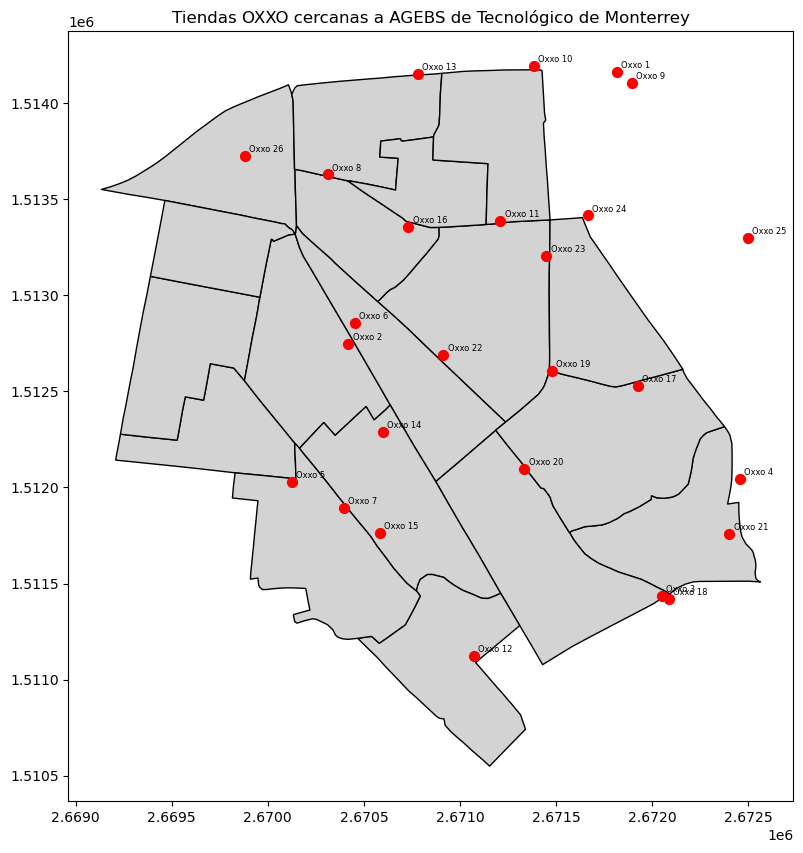

In [101]:
ax = tec_gdf.plot(edgecolor='black', facecolor='lightgray', figsize=(10, 10))

#tec_ageb_gdf.set_geometry('Centroide').plot(ax=ax, marker='o', color='blue', markersize=50)
oxxo_tec_gdf.set_geometry('geometry').plot(ax=ax, marker='o', color='red', markersize=50)

#for x, y, label in zip(tec_ageb_gdf.Longitud, tec_ageb_gdf.Latitud, tec_ageb_gdf.CVE_AGEB):
#    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=10)

for x, y, label in zip(oxxo_tec_gdf.Longitdud, oxxo_tec_gdf.Latitud, oxxo_dist_matrix.TIENDA_TYPE):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=6)
plt.title('Tiendas OXXO cercanas a AGEBS de Tecnológico de Monterrey')

In [102]:
seven11_df = pd.DataFrame({
    'LONGITUD_NUM': [-100.29258, -100.29066, -100.29215, -100.29262, -100.29621, -100.28395, -100.28169, -100.29024, -100.29349, -100.29621, -100.29891, -100.29558, -100.28405, -100.28702, -100.27374, -100.27732, -100.30585],
    'LATITUD_NUM': [25.65134, 25.64794, 25.64644, 25.64859, 25.64816, 25.64810, 25.65280, 25.65713, 25.65704, 25.66080, 25.66158, 25.66417, 25.66347, 25.66044, 25.66055, 25.64399, 25.65149]
})

seven11_gdf = gpd.GeoDataFrame(
    seven11_df,
    geometry=gpd.points_from_xy(seven11_df['LONGITUD_NUM'], seven11_df['LATITUD_NUM']),
    crs="EPSG:4326"
)

oxxo_mean = oxxo_gdf2['MTS2VENTAS_NUM'].mean()
oxxo_std = oxxo_gdf2['MTS2VENTAS_NUM'].std()

np.random.seed(42)
seven11_gdf['TAMANOMTS2_NUM'] = np.random.normal(loc=oxxo_mean, scale=oxxo_std, size=len(seven11_gdf))
seven11_gdf['TAMANOMTS2_NUM'] = seven11_gdf['TAMANOMTS2_NUM'].clip(lower=0)
seven11_gdf.at[seven11_gdf.index[0], 'TAMANOMTS2_NUM'] = 361


seven11_gdf = seven11_gdf.to_crs(tec_ageb_gdf.crs)

seven11_gdf['Longitud'] = seven11_gdf.geometry.x
seven11_gdf['Latitud'] = seven11_gdf.geometry.y
seven11_gdf

,LONGITUD_NUM,LATITUD_NUM,geometry,TAMANOMTS2_NUM,Longitud,Latitud
0,-100.29258,25.65134,POINT (2.67e+06 1.51e+06),361.000000,2.670621e+06,1.512411e+06
1,-100.29066,25.64794,POINT (2.67e+06 1.51e+06),103.865621,2.670818e+06,1.512038e+06
2,-100.29215,25.64644,POINT (2.67e+06 1.51e+06),116.656743,2.670671e+06,1.511871e+06
3,-100.29262,25.64859,POINT (2.67e+06 1.51e+06),130.902633,2.670621e+06,1.512108e+06
4,-100.29621,25.64816,POINT (2.67e+06 1.51e+06),102.305058,2.670263e+06,1.512056e+06
5,-100.28395,25.64810,POINT (2.67e+06 1.51e+06),102.305326,2.671488e+06,1.512064e+06
6,-100.28169,25.65280,POINT (2.67e+06 1.51e+06),131.816992,2.671708e+06,1.512585e+06
7,-100.29024,25.65713,POINT (2.67e+06 1.51e+06),118.605573,2.670848e+06,1.513052e+06
8,-100.29349,25.65704,POINT (2.67e+06 1.51e+06),98.475287,2.670523e+06,1.513038e+06
9,-100.29621,25.66080,POINT (2.67e+06 1.51e+06),114.945812,2.670246e+06,1.513450e+06


In [103]:
seven11_dist_matrix = seven11_gdf.geometry.apply(lambda x: tec_ageb_gdf['Centroide'].distance(x))
min_distances = seven11_dist_matrix.min(axis=1)
seven11_gdf = seven11_gdf[(min_distances <= 900)]

seven11_dist_matrix.columns = tec_ageb_gdf['CVE_AGEB']
seven11_dist_matrix['Tamano'] = seven11_gdf['TAMANOMTS2_NUM']
seven11_dist_matrix['TIENDA_TYPE'] = '7-Eleven'

seven11_dist_matrix


CVE_AGEB,2114,2063,1760,1934,192A,1991,2006,1775,178A,210A,1915,2010,2025,4661,2097,1794,2167,2082,Tamano,TIENDA_TYPE
0,1649.790250,876.986247,1506.597766,724.917966,927.409293,1098.733293,514.516100,1482.322273,1176.703812,1083.150602,1226.188543,216.523044,1170.422739,1194.511016,486.377535,1522.804404,1373.523587,831.754684,361.000000,7-Eleven
1,1353.376309,1090.175876,1926.659431,944.032841,1332.821191,1421.671546,908.854820,1877.767292,1526.210109,695.254671,1629.398287,570.994207,978.862687,1237.861313,179.249833,1821.683954,967.590667,656.371570,103.865621,7-Eleven
2,1478.480109,1002.974564,2004.190838,1153.165114,1468.658027,1387.780439,956.855991,2024.267252,1702.924761,759.037750,1668.985896,732.316394,1163.501429,1459.633861,56.778647,2018.864900,844.198301,441.363185,116.656743,7-Eleven
3,1559.963369,883.349639,1769.994066,965.807278,1227.837853,1215.898077,730.402524,1784.540439,1475.163432,899.133430,1449.173161,504.530695,1163.109654,1345.625475,188.421751,1807.077919,1083.431640,566.432867,130.902633,7-Eleven
4,1903.579703,555.128522,1687.958631,1229.364051,1289.250944,955.968835,650.255373,1845.626909,1620.341476,1204.184512,1305.517258,714.351152,1524.790120,1675.248406,433.318159,1997.059155,1205.078983,408.910779,102.305058,7-Eleven
5,716.430699,1746.878667,2328.523003,938.380780,1617.286434,2029.314541,1439.756394,2078.251569,1628.022670,416.832402,2124.197491,934.240543,333.712522,857.499950,822.677062,1778.894929,1106.751500,1268.155867,102.305326,7-Eleven
6,915.086521,1977.062506,2188.491106,675.447876,1436.284290,2147.624985,1514.424380,1782.431107,1298.144120,978.058942,2092.409153,983.834505,362.027876,306.082312,1222.579255,1334.831636,1670.719526,1699.210776,131.816992,7-Eleven
7,1816.719973,1338.970628,1210.478387,304.937078,460.738361,1329.392887,737.569187,908.393308,512.145706,1500.185688,1142.069597,467.080990,1241.496732,882.479540,1137.244038,844.529226,1972.541584,1510.671901,118.605573,7-Eleven
8,2052.890690,1080.431390,957.987133,613.760448,292.418509,1014.736471,467.002557,849.858652,622.145878,1635.721195,827.210736,480.655030,1492.669464,1201.334486,1121.129955,1033.847458,2006.146890,1409.600894,98.475287,7-Eleven
9,2528.247939,1269.784126,490.751115,1022.562068,262.087974,1008.081415,748.079557,501.692854,619.835866,2131.293404,563.237019,973.211705,1957.875115,1571.617061,1581.536195,1023.077857,2475.509967,1802.044628,114.945812,7-Eleven


Text(0.5, 1.0, 'Tiendas cercanas a AGEBS de Tecnológico de Monterrey')

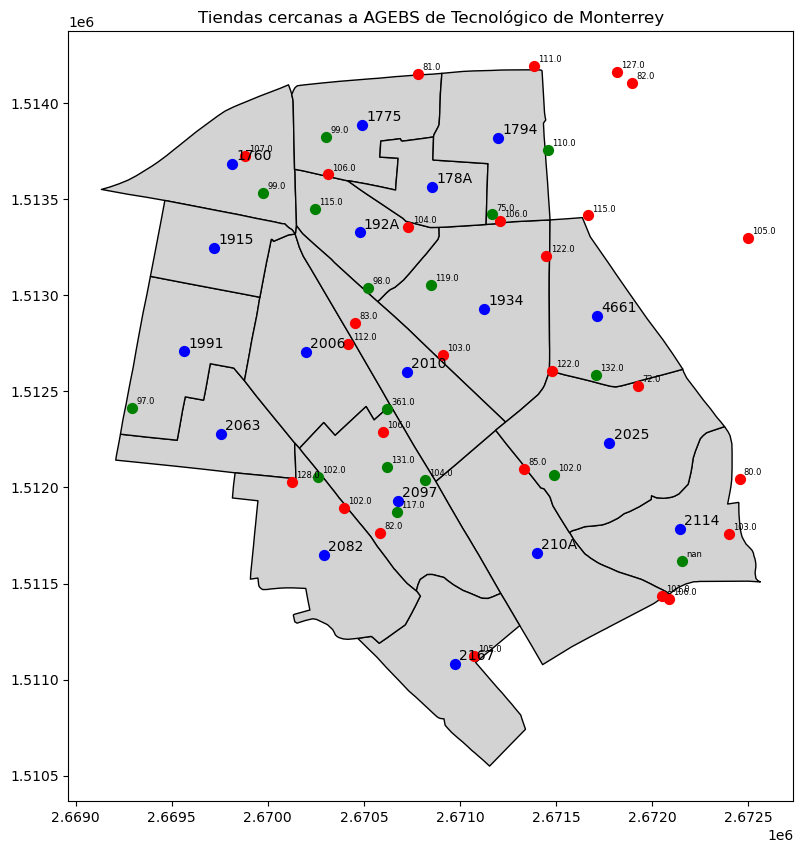

In [104]:
ax = tec_gdf.plot(edgecolor='black', facecolor='lightgray', figsize=(10, 10))

tec_ageb_gdf.set_geometry('Centroide').plot(ax=ax, marker='o', color='blue', markersize=50)
oxxo_tec_gdf.set_geometry('geometry').plot(ax=ax, marker='o', color='red', markersize=50)
seven11_gdf.set_geometry('geometry').plot(ax=ax, marker='o', color='green', markersize=50)


for x, y, label in zip(tec_ageb_gdf.Longitud, tec_ageb_gdf.Latitud, tec_ageb_gdf.CVE_AGEB):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=10)

for x, y, label in zip(oxxo_tec_gdf.Longitdud, oxxo_tec_gdf.Latitud, oxxo_dist_matrix.Tamano.round(0)):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=6)

for x, y, label in zip(seven11_gdf.Longitud, seven11_gdf.Latitud, seven11_dist_matrix.Tamano.round(0)):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=6)
plt.title('Tiendas cercanas a AGEBS de Tecnológico de Monterrey')



In [105]:
dist_matrix = pd.concat([oxxo_dist_matrix, seven11_dist_matrix], axis=0)
dist_matrix = dist_matrix.reset_index(drop=True)
dist_matrix = dist_matrix.fillna(0)

dist_matrix

,2114,2063,1760,1934,192A,1991,2006,1775,178A,210A,...,2025,4661,2097,1794,2167,2082,Tamano,TIENDA_TYPE,nombre_tienda,monto
0,2401.437944,2792.564311,2058.888178,1410.992808,1577.773947,2681.785747,2179.170382,1354.522111,1132.191867,2538.691334,...,1931.459530,1273.997078,2507.635767,705.561621,3190.569791,2940.648032,127.360000,Oxxo 1,Francisco Villa MTY,6.026043e+06
1,1977.866212,812.719084,1115.616158,731.250724,584.206138,856.835404,225.807618,1143.811946,927.067731,1464.697359,...,1452.967379,1303.795930,857.685814,1327.342658,1752.551280,1105.508350,112.000000,Oxxo 2,Pirineos MTY,5.681977e+06
2,360.766095,2445.248312,3170.189105,1757.089098,2459.828956,2792.856243,2244.278572,2906.055345,2441.371584,687.267012,...,840.240371,1494.134396,1458.444829,2531.572927,1130.541718,1772.121331,100.570000,Oxxo 3,Tres Caminos MTY,1.502796e+07
3,405.739798,2711.405825,3107.933855,1596.569135,2357.038706,2967.180152,2351.847701,2693.639423,2206.638974,1125.717987,...,702.751064,1124.341158,1782.816020,2173.934065,1765.666553,2201.688688,79.863300,Oxxo 4,La Primavera MTY,9.492603e+06
4,2036.096517,448.407912,1685.457085,1349.068078,1347.366715,882.787772,680.081230,1896.272191,1701.882633,1326.316053,...,1664.846171,1809.588901,560.291113,2090.190898,1269.265012,413.090979,127.640000,Oxxo 5,Aguanaval MTY,1.214137e+07
5,2004.393841,905.278238,1046.361306,678.207279,473.462314,901.662756,296.863537,1033.810843,815.784981,1525.939077,...,1464.404855,1262.553612,953.246096,1220.358964,1845.947726,1217.341647,82.808700,Oxxo 6,Roma II MTY,4.818259e+06
6,1752.431765,749.975417,1882.604487,1267.798379,1436.096226,1165.856028,833.984816,1996.337385,1732.344785,1028.788654,...,1420.410234,1652.576613,281.131714,2086.592926,994.232715,267.901452,102.383300,Oxxo 7,Mini Mexico MTY,6.210274e+06
7,2603.220333,1460.707283,500.213704,1073.553863,344.380295,1186.908476,932.939892,314.409898,547.185564,2251.764727,...,2026.299623,1585.427231,1739.875639,908.242262,2630.158268,1981.042918,105.783800,Oxxo 8,Plaza Florida MTY,1.149587e+07
8,2334.955202,2811.999706,2121.382227,1401.555464,1614.924401,2716.523916,2199.667937,1419.794257,1170.420970,2496.049829,...,1877.150778,1225.504625,2493.070802,749.924864,3156.602835,2932.859928,81.861200,Oxxo 9,Chapultepec II MTY,1.135172e+07
9,2528.069517,2515.576508,1652.284773,1289.192185,1255.067302,2351.467895,1906.140642,946.298368,823.234051,2536.274606,...,2001.947890,1343.032112,2373.986938,417.547592,3136.666567,2771.226689,110.940000,Oxxo 10,Los Portales MTY,1.012559e+07


In [106]:
adicional_dist = dist_matrix[['Tamano', 'TIENDA_TYPE', 'monto']].copy()
dist_df = dist_matrix.drop(columns=['Tamano', 'TIENDA_TYPE', 'nombre_tienda', 'monto'])

size_max = adicional_dist['Tamano'].max()
adicional_dist['Tamano'] = adicional_dist['Tamano'].apply(lambda x: ((x) / size_max) * (11.25))

adicional_dist

,Tamano,TIENDA_TYPE,monto
0,3.968975,Oxxo 1,6.026043e+06
1,3.490305,Oxxo 2,5.681977e+06
2,3.134107,Oxxo 3,1.502796e+07
3,2.488815,Oxxo 4,9.492603e+06
4,3.977701,Oxxo 5,1.214137e+07
5,2.580604,Oxxo 6,4.818259e+06
6,3.190615,Oxxo 7,6.210274e+06
7,3.296587,Oxxo 8,1.149587e+07
8,2.551076,Oxxo 9,1.135172e+07
9,3.457271,Oxxo 10,1.012559e+07


In [107]:
dist_df2 = dist_df.apply(lambda x: 10 * (1 - (x / 1000)))
dist_df2 = dist_df2.clip(lower=0)

dist_df2

,2114,2063,1760,1934,192A,1991,2006,1775,178A,210A,1915,2010,2025,4661,2097,1794,2167,2082
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.944384,0.000000,0.000000
1,0.000000,1.872809,0.000000,2.687493,4.157939,1.431646,7.741924,0.000000,0.729323,0.000000,1.426450,6.631093,0.000000,0.000000,1.423142,0.000000,0.000000,0.000000
2,6.392339,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.127330,0.000000,0.000000,1.597596,0.000000,0.000000,0.000000,0.000000,0.000000
3,5.942602,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.972489,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,5.515921,0.000000,0.000000,0.000000,1.172122,3.199188,0.000000,0.000000,0.000000,0.000000,1.700531,0.000000,0.000000,4.397089,0.000000,0.000000,5.869090
5,0.000000,0.947218,0.000000,3.217927,5.265377,0.983372,7.031365,0.000000,1.842150,0.000000,1.712133,6.296161,0.000000,0.000000,0.467539,0.000000,0.000000,0.000000
6,0.000000,2.500246,0.000000,0.000000,0.000000,0.000000,1.660152,0.000000,0.000000,0.000000,0.000000,2.201923,0.000000,0.000000,7.188683,0.000000,0.057673,7.320985
7,0.000000,0.000000,4.997863,0.000000,6.556197,0.000000,0.670601,6.855901,4.528144,0.000000,2.953828,0.000000,0.000000,0.000000,0.000000,0.917577,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500751,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.537016,1.767659,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.824524,0.000000,0.000000


In [108]:
print((dist_df2.sum(axis=0) > 0).all())
print((dist_df2.sum(axis=1) > 0).all())

True
True


In [109]:
size_mean = adicional_dist['Tamano'].mean()
dist_mean = dist_df2.where(dist_df2 > 0).mean().mean()

dist_mean
size_mean
dist_mean/size_mean


1.0273097273617164

In [110]:
demand_j = tec['POBTOT']
demand_j.index = tec['AGEB']
demand_j

AGEB
1760    1986
1775    3247
178A    2085
1794    2555
1915    1171
192A    2553
1934    2171
1991    3236
2006    1972
2010     377
2025    4868
2063    2407
2082    2402
2097    4087
210A    2790
2114    2387
2167    2883
4661    2902
Name: POBTOT, dtype: int64

In [111]:
B_j = (dist_df2.mul(adicional_dist['Tamano'], axis=0)).sum(axis=0)
B_j

2114    125.704590
2063     91.954621
1760    106.643842
1934    236.442287
192A    215.171981
1991     32.777516
2006    215.704328
1775    136.694214
178A    192.271893
210A    101.474643
1915     82.751622
2010    313.743209
2025    129.719050
4661    144.380240
2097    282.010834
1794    157.463343
2167     41.581179
2082    162.482346
dtype: float64

In [112]:

R_j =  demand_j * (1 - (B_j / (50 + B_j)))
R_j

1760     633.922144
1775     869.603813
178A     430.301670
1794     615.771432
1915     441.049226
192A     481.385701
1934     378.959409
1991    1954.637044
2006     371.089176
2010      51.822273
2025    1354.336113
2063     847.806145
2082     565.223429
2097     615.491963
210A     920.946219
2114     679.265123
2167    1574.013365
4661     746.475053
dtype: float64

In [113]:
oxxo_tec_gdf

,TIENDA_ID,VENTA_TOTAL,MTS2VENTAS_NUM,geometry,Longitdud,Latitud,TIENDA_TYPE
0,214,1.271248e+06,127.3600,POINT (2.67e+06 1.51e+06),2.671818e+06,1.514161e+06,Oxxo 1
1,222,7.817817e+05,112.0000,POINT (2.67e+06 1.51e+06),2.670419e+06,1.512746e+06,Oxxo 2
2,246,8.099015e+05,100.5700,POINT (2.67e+06 1.51e+06),2.672049e+06,1.511435e+06,Oxxo 3
3,167,1.578510e+06,79.8633,POINT (2.67e+06 1.51e+06),2.672456e+06,1.512045e+06,Oxxo 4
4,237,1.377404e+06,127.6400,POINT (2.67e+06 1.51e+06),2.670125e+06,1.512027e+06,Oxxo 5
5,242,8.607818e+05,82.8087,POINT (2.67e+06 1.51e+06),2.670453e+06,1.512854e+06,Oxxo 6
6,177,7.179914e+05,102.3833,POINT (2.67e+06 1.51e+06),2.670398e+06,1.511893e+06,Oxxo 7
7,584,1.380686e+06,105.7838,POINT (2.67e+06 1.51e+06),2.670312e+06,1.513629e+06,Oxxo 8
8,638,8.932672e+05,81.8612,POINT (2.67e+06 1.51e+06),2.671894e+06,1.514103e+06,Oxxo 9
9,251,1.371232e+06,110.9400,POINT (2.67e+06 1.51e+06),2.671387e+06,1.514193e+06,Oxxo 10


In [114]:
from sklearn.cluster import KMeans

oxxo_cluster_df = pd.merge(oxxo_ventas_df, oxxo_tec_gdf, on='TIENDA_TYPE', how='left')

coords = oxxo_cluster_df[['Longitdud', 'Latitud']].values
weights = oxxo_cluster_df['monto'].values

n_clusters = 8

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(coords, sample_weight=weights)

oxxo_cluster_df['cluster'] = kmeans.labels_

oxxo_cluster_df[['TIENDA_TYPE', 'Longitdud', 'Latitud', 'monto', 'cluster']]


/Users/da.depool/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,TIENDA_TYPE,Longitdud,Latitud,monto,cluster
0,Oxxo 1,2.671818e+06,1.514161e+06,6.026043e+06,3
1,Oxxo 2,2.670419e+06,1.512746e+06,5.681977e+06,2
2,Oxxo 3,2.672049e+06,1.511435e+06,1.502796e+07,0
3,Oxxo 4,2.672456e+06,1.512045e+06,9.492603e+06,0
4,Oxxo 5,2.670125e+06,1.512027e+06,1.214137e+07,2
5,Oxxo 6,2.670453e+06,1.512854e+06,4.818259e+06,2
6,Oxxo 7,2.670398e+06,1.511893e+06,6.210274e+06,2
7,Oxxo 8,2.670312e+06,1.513629e+06,1.149587e+07,1
8,Oxxo 9,2.671894e+06,1.514103e+06,1.135172e+07,3
9,Oxxo 10,2.671387e+06,1.514193e+06,1.012559e+07,3


In [115]:
candidate_oxxo = kmeans.cluster_centers_
candidate_oxxo_df = pd.DataFrame(candidate_oxxo, columns=['Longitdud', 'Latitud'])
candidate_oxxo_df['geometry'] = gpd.points_from_xy(candidate_oxxo_df['Longitdud'], candidate_oxxo_df['Latitud'])
candidate_oxxo_gdf = gpd.GeoDataFrame(candidate_oxxo_df, crs=tec_ageb_gdf.crs)

candidate_oxxo_gdf
candidate_oxxo_gdf['TIENDA_TYPE'] = ['Oxxo {}'.format(i+1) for i in range(len(candidate_oxxo_gdf))]

In [116]:
candidate_oxxo_dist_matrix = candidate_oxxo_gdf.geometry.apply(lambda x: tec_ageb_gdf['Centroide'].distance(x))
min_distances = candidate_oxxo_dist_matrix.min(axis=1)
candidate_oxxo_gdf = candidate_oxxo_gdf[(min_distances <= 900)]

candidate_oxxo_dist_matrix.columns = tec_ageb_gdf['CVE_AGEB']
candidate_oxxo_dist_matrix['TIENDA_TYPE'] = 'Candidate Oxxo'

candidate_oxxo_dist_matrix

CVE_AGEB,2114,2063,1760,1934,192A,1991,2006,1775,178A,210A,1915,2010,2025,4661,2097,1794,2167,2082,TIENDA_TYPE
0,177.753850,2546.215399,3165.663556,1704.001979,2436.148744,2865.300989,2289.230441,2849.631753,2373.641592,815.160417,2975.551070,1785.180534,751.566754,1367.606974,1567.480518,2424.157694,1348.572808,1923.327417,Candidate Oxxo
1,2564.290668,1580.660526,630.647602,1028.773583,374.819626,1327.765215,1027.776509,192.434498,432.253941,2255.292696,855.397100,1133.737610,1984.648545,1506.133122,1787.912527,764.159124,2669.978871,2058.411498,Candidate Oxxo
2,1714.933514,757.391151,1549.652474,881.592730,1028.503850,1032.295803,511.323845,1588.401980,1310.807976,1095.519424,1231.480920,369.546961,1268.087025,1341.262728,406.596566,1668.923972,1300.849376,687.841507,Candidate Oxxo
3,2410.488455,2691.797837,1932.616062,1342.596452,1464.740696,2569.238368,2078.192127,1227.754092,1019.544610,2509.089281,2166.710434,1824.413969,1921.182245,1258.275380,2441.655488,590.830383,3147.838814,2866.349639,Candidate Oxxo
4,1697.182092,2029.192118,1701.314751,544.629971,1003.952397,2020.914081,1434.923470,1130.373981,664.145652,1688.750673,1762.861213,1060.607211,1152.455379,509.283817,1628.762146,553.073469,2316.194149,2072.496413,Candidate Oxxo
5,1258.133045,1752.439099,2851.139166,1805.886342,2281.108607,2187.418366,1804.552815,2823.084130,2448.686306,623.362536,2513.399933,1517.265142,1309.936134,1878.721264,895.261923,2697.283079,107.294545,941.894925,Candidate Oxxo
6,1558.148153,2927.034982,2709.935475,1419.386329,2019.665679,2993.162670,2375.933119,2090.773920,1663.206402,1976.645552,2776.284693,1906.148976,1289.886561,882.839258,2280.069640,1397.521138,2689.265210,2757.215483,Candidate Oxxo
7,839.642469,1794.143618,2173.847361,700.467076,1435.003714,2011.486690,1389.203139,1849.182665,1380.429145,727.264308,2023.511734,854.598840,270.111885,548.537000,975.139110,1491.198642,1406.828862,1448.437260,Candidate Oxxo


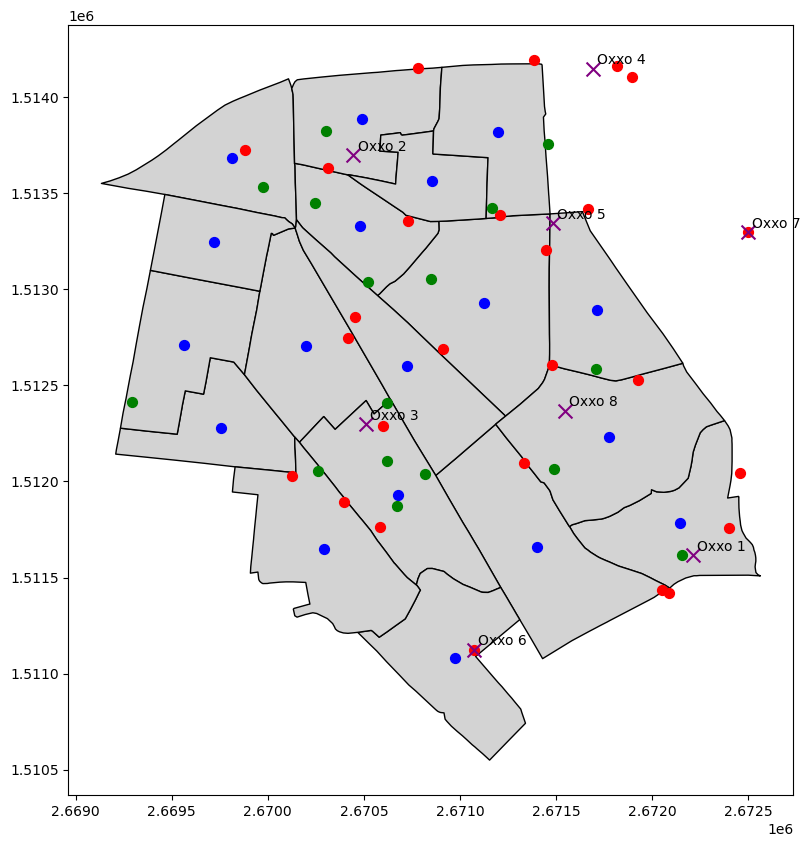

In [117]:
ax = tec_gdf.plot(edgecolor='black', facecolor='lightgray', figsize=(10, 10))

tec_ageb_gdf.set_geometry('Centroide').plot(ax=ax, marker='o', color='blue', markersize=50)
oxxo_tec_gdf.set_geometry('geometry').plot(ax=ax, marker='o', color='red', markersize=50)
seven11_gdf.set_geometry('geometry').plot(ax=ax, marker='o', color='green', markersize=50)
candidate_oxxo_gdf.set_geometry('geometry').plot(ax=ax, marker='x', color='purple', markersize=100)

for x, y, label in zip(candidate_oxxo_gdf.Longitdud, candidate_oxxo_gdf.Latitud, candidate_oxxo_gdf.TIENDA_TYPE):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=10)

In [118]:
candidate_oxxo_gdf_latlon = candidate_oxxo_gdf.to_crs(epsg=4326)

candidate_oxxo_gdf_latlon_coords = pd.DataFrame({
    'Longitud': candidate_oxxo_gdf_latlon.geometry.x,
    'Latitud': candidate_oxxo_gdf_latlon.geometry.y
})
candidate_oxxo_gdf_latlon_coords

,Longitud,Latitud
0,-100.276749,25.643968
1,-100.294189,25.663055
2,-100.293693,25.650339
3,-100.281673,25.666986
4,-100.283858,25.659705
5,-100.288210,25.639630
6,-100.273700,25.659200
7,-100.283330,25.650860


In [119]:
d_ik = candidate_oxxo_gdf.geometry.apply(lambda x: oxxo_tec_gdf['geometry'].distance(x))

d_ik.columns = oxxo_tec_gdf['TIENDA_TYPE']
d_ik

TIENDA_TYPE,Oxxo 1,Oxxo 2,Oxxo 3,Oxxo 4,Oxxo 5,Oxxo 6,Oxxo 7,Oxxo 8,Oxxo 9,Oxxo 10,...,Oxxo 17,Oxxo 18,Oxxo 19,Oxxo 20,Oxxo 21,Oxxo 22,Oxxo 23,Oxxo 24,Oxxo 25,Oxxo 26
0,2574.193561,2119.236951,245.313704,491.662055,2127.675215,2151.296446,1836.320057,2767.916602,2506.476388,2705.314172,...,954.689611,232.672254,1234.569280,999.763038,236.751454,1685.004083,1761.382822,1880.382232,1706.804372,3145.051887
1,1447.482049,954.998443,2776.258028,2604.502534,1704.061832,846.231589,1807.856122,151.221351,1503.925568,1062.369830,...,1889.723974,2810.291992,1502.638018,1834.752087,2756.180751,1113.876642,1120.734618,1252.255738,2090.978746,564.690316
2,2274.036051,456.065519,1764.167895,1960.743154,472.651277,558.201850,421.546913,1344.585390,2272.985723,2086.235317,...,1434.029288,1805.097919,1014.308818,848.793146,1966.115624,560.932649,1304.406909,1605.128761,2223.934503,1561.138868
3,127.622653,1893.133735,2737.950030,2238.920639,2636.941182,1790.778856,2599.836350,1473.299034,208.765740,307.190162,...,1638.106724,2757.070423,1554.984765,2082.972803,2492.961622,1652.722387,974.202877,733.619158,1171.204554,1857.794822
4,883.505782,1218.898619,1991.522634,1623.304131,1890.532223,1139.036974,1810.666652,1204.090760,864.418284,854.858760,...,929.221013,2016.243845,734.961378,1255.688553,1831.832894,865.817155,142.285829,196.577552,1016.594732,1646.047440
5,3125.472006,1747.715531,1023.648196,1660.169964,1308.479297,1837.093754,1023.128208,2616.988528,3089.110620,3083.845601,...,1642.166076,1057.069428,1537.463692,1006.003766,1472.391203,1573.019301,2113.497339,2365.652919,2599.628339,2862.428130
6,1096.826103,2150.618564,1918.604768,1255.978250,2692.353454,2092.332489,2527.482125,2210.050940,1004.485414,1425.372519,...,959.890461,1923.381943,1232.306871,1672.907577,1543.348983,1697.066664,1051.479555,840.825078,0.000000,2650.993749
7,1812.175733,1188.123828,1061.218940,965.473077,1461.637991,1195.984953,1243.188927,1763.708908,1768.794773,1831.043063,...,412.748971,1092.336123,249.262674,344.468440,1050.626901,709.231613,841.260785,1053.416127,1331.060560,2148.919594


In [120]:
tamano_oxxo = [111, 115, 126, 143, 167, 79, 89, 185]

candidate_oxxo_dist_matrix['Tamano'] = tamano_oxxo

candidate_oxxo_additional = candidate_oxxo_dist_matrix[['Tamano', 'TIENDA_TYPE']].copy()
co_dist_matrix = candidate_oxxo_dist_matrix.drop(columns=['Tamano', 'TIENDA_TYPE'])


In [121]:
anos_a_pagar = 5
p_mt2 = 12000 / anos_a_pagar
candidate_oxxo_dist_matrix['F_i'] = candidate_oxxo_dist_matrix['Tamano'] * (p_mt2 * 2)

candidate_oxxo_additional['F_i'] = candidate_oxxo_dist_matrix['F_i']

candidate_oxxo_additional

CVE_AGEB,Tamano,TIENDA_TYPE,F_i
0,111,Candidate Oxxo,532800.0
1,115,Candidate Oxxo,552000.0
2,126,Candidate Oxxo,604800.0
3,143,Candidate Oxxo,686400.0
4,167,Candidate Oxxo,801600.0
5,79,Candidate Oxxo,379200.0
6,89,Candidate Oxxo,427200.0
7,185,Candidate Oxxo,888000.0


In [122]:
co_dist_matrix2 = co_dist_matrix.apply(lambda x: 10 * (1 - (x / 1000)))
co_dist_matrix2 = co_dist_matrix2.clip(lower=0)

co_dist_matrix2



CVE_AGEB,2114,2063,1760,1934,192A,1991,2006,1775,178A,210A,1915,2010,2025,4661,2097,1794,2167,2082
0,8.222461,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.848396,0.000000,0.000000,2.484332,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,3.693524,0.000000,6.251804,0.0,0.000000,8.075655,5.677461,0.000000,1.446029,0.000000,0.000000,0.000000,0.000000,2.358409,0.000000,0.000000
2,0.000000,2.426088,0.000000,1.184073,0.000000,0.0,4.886762,0.000000,0.000000,0.000000,0.000000,6.304530,0.000000,0.000000,5.934034,0.000000,0.000000,3.121585
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.091696,0.000000,0.000000
4,0.000000,0.000000,0.000000,4.553700,0.000000,0.0,0.000000,0.000000,3.358543,0.000000,0.000000,0.000000,0.000000,4.907162,0.000000,4.469265,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.766375,0.000000,0.000000,0.000000,0.000000,1.047381,0.000000,8.927055,0.581051
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.171607,0.000000,0.000000,0.000000,0.000000
7,1.603575,0.000000,0.000000,2.995329,0.000000,0.0,0.000000,0.000000,0.000000,2.727357,0.000000,1.454012,7.298881,4.514630,0.248609,0.000000,0.000000,0.000000


In [123]:
size_max = candidate_oxxo_additional['Tamano'].max()
candidate_oxxo_additional['Tamano'] = candidate_oxxo_additional['Tamano'].apply(lambda x: ((x) / size_max) * (11.25))

candidate_oxxo_additional

CVE_AGEB,Tamano,TIENDA_TYPE,F_i
0,6.750000,Candidate Oxxo,532800.0
1,6.993243,Candidate Oxxo,552000.0
2,7.662162,Candidate Oxxo,604800.0
3,8.695946,Candidate Oxxo,686400.0
4,10.155405,Candidate Oxxo,801600.0
5,4.804054,Candidate Oxxo,379200.0
6,5.412162,Candidate Oxxo,427200.0
7,11.250000,Candidate Oxxo,888000.0


In [124]:
A_ij = co_dist_matrix2.mul(candidate_oxxo_additional['Tamano'], axis=0)
A_ij = A_ij.fillna(0)

A_ij

CVE_AGEB,2114,2063,1760,1934,192A,1991,2006,1775,178A,210A,1915,2010,2025,4661,2097,1794,2167,2082
0,55.501615,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,12.476672,0.000000,0.000000,16.769244,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,25.829712,0.000000,43.720384,0.0,0.000000,56.47502,39.703863,0.000000,10.112433,0.000000,0.000000,0.000000,0.000000,16.492926,0.000000,0.000000
2,0.000000,18.589083,0.000000,9.072557,0.000000,0.0,37.443159,0.00000,0.000000,0.000000,0.000000,48.306334,0.000000,0.000000,45.467533,0.000000,0.000000,23.918090
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.581169,0.000000,0.000000
4,0.000000,0.000000,0.000000,46.244673,0.000000,0.0,0.000000,0.00000,34.107371,0.000000,0.000000,0.000000,0.000000,49.834218,0.000000,45.387201,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,18.093867,0.000000,0.000000,0.000000,0.000000,5.031674,0.000000,42.886053,2.791399
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,6.340929,0.000000,0.000000,0.000000,0.000000
7,18.040222,0.000000,0.000000,33.697454,0.000000,0.0,0.000000,0.00000,0.000000,30.682765,0.000000,16.357631,82.112413,50.789588,2.796850,0.000000,0.000000,0.000000


In [125]:
P_k = oxxo_dist_matrix['monto']
P_k.index = oxxo_dist_matrix['TIENDA_TYPE']

In [126]:
#R_j = R_j
#B_j = B_j
#A_ij = A_ij
f_i = candidate_oxxo_additional['F_i']
#P_k = P_k
#d_ik = d_ik
pi = 1000
M = 250
alpha = 0.5
delta = 1

epsilon = 1e-5

In [127]:
import pyomo.environ as pyo

model = pyo.ConcreteModel()

model.I = pyo.Set(initialize = A_ij.index)
model.J = pyo.Set(initialize = A_ij.columns)
model.K = pyo.Set(initialize = d_ik.columns)

model.Y = pyo.Var(model.I, domain=pyo.Binary)
model.X = pyo.Var(model.I, model.J, bounds=(0, 1))

In [128]:
model.obj = pyo.Objective(
    expr=sum(pi * R_j[j] * model.X[i, j] for i in model.I for j in model.J)
        - sum(f_i[i] * model.Y[i] for i in model.I),
    sense=pyo.maximize
)

In [129]:
# Restricción: suma de X_ij ≤ 1 por zona j
def prop_limit_rule(model, j):
    return sum(model.X[i, j] for i in model.I) <= 1
model.prop_limit = pyo.Constraint(model.J, rule=prop_limit_rule)

# Restricción: Xij solo si Yi = 1
def logic_link_rule(model, i, j):
    return model.X[i, j] <= model.Y[i]
model.logic_link = pyo.Constraint(model.I, model.J, rule=logic_link_rule)

# Restricción: Proporción máxima por atractividad
def attractivity_rule(model, i, j):
    return model.X[i, j] <= A_ij.loc[i, j] / (B_j.loc[j] + epsilon)
model.attractivity_limit = pyo.Constraint(model.I, model.J, rule=attractivity_rule)

# Canibalización por tienda existente k
def cannibalization_rule(model, i, k):
    expr = sum(
        pi * R_j.loc[j] * model.X[i, j] / (1 + (d_ik.loc[i, k] / M)**2)
        for j in model.J
    )
    return expr <= alpha * P_k.loc[k]
model.cannibalization = pyo.Constraint(model.I, model.K, rule=cannibalization_rule)


# Retorno sobre inversión
def roi_rule(model):
    lhs = sum(pi * R_j.loc[j] * model.X[i, j] for i in model.I for j in model.J)
    rhs = sum(delta * f_i.loc[i] * model.Y[i] for i in model.I)
    return lhs >= rhs
model.ROI = pyo.Constraint(rule=roi_rule)

In [133]:
solver = pyo.SolverFactory('glpk') 
solver.solve(model)
results = solver.solve(model)
#print(results.solver.status)
#print(results.solver.termination_condition)

selected_stores = [i for i in model.I if pyo.value(model.Y[i]) > 0.5]
print("Tiendas a abrir:", selected_stores)

Tiendas a abrir: [0, 1, 5, 7]


In [131]:
ingresos = sum(pi * R_j[j] * pyo.value(model.X[i, j]) for i in selected_stores for j in model.J)
print("Ingresos esperados:", ingresos)

Ingresos esperados: 4723674.598377285
